In [ ]:
from nbdev import *
%nbdev_default_export plotting

Cells will be exported to pct.plotting,
unless a different module is specified after an export flag: `%nbdev_export special.module`


# Plotting

> Plotting classes.

In [ ]:
#export
import matplotlib.pyplot as plt

In [ ]:
#export
class SubPlotter(object):

  def __init__(self, width, height, title, plotsconfig=[["title", "xlabel", "ylabel", 1, 0, 111]]):
      

    self.fig = plt.figure(figsize=[width, height])
    self.fig.canvas.set_window_title(title)
    
    self.plots=[]
    self.colors=['b',  'r', 'g', 'c', 'm', 'y', 'k', 'w']

    for plotconfig in plotsconfig:
        #print(plotconfig)
        ys=[]
        for line in range(plotconfig[3]):
            ys.append([])
        plot = dict([("title", plotconfig[0]), ("xlabel", plotconfig[1]), 
                     ("ylabel", plotconfig[2]), ("window", plotconfig[4]), 
                     ("subplot", plt.subplot(plotconfig[5])), ("x", []), ("ys", ys)])
        #print(plot)

        self.plots.append(plot)
    
  def add_data(self, index, x, ys):
    #print(ys)
    plot= self.plots[index]
    plot["x"].append(x)
    for i in range(len(ys)):
        plot["ys"][i].append(ys[i])
    window = plot["window"]
    if window > 0:
        if x > window:
            plot["x"].pop(0)
            for i in range(len(ys)):
                plot["ys"][i].pop(0)
            
        
  def show(self):
    plt.show()
        
  def draw(self):
    for plot in self.plots:
        plot["subplot"].clear()
        #print(plot["ys"])
        ctr=0
        for y in plot["ys"]:
            plot["subplot"].plot(plot["x"], y, self.colors[ctr])
            ctr+=1
        plot["subplot"].set_title(plot["title"])
        plot["subplot"].set_xlabel(plot["xlabel"])
        plot["subplot"].set_ylabel(plot["ylabel"])
        #self.ax1.margins(x=5,y=10)

    plt.tight_layout()

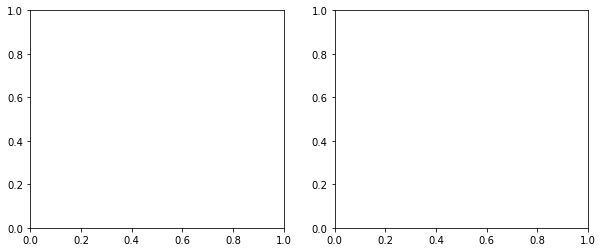

In [ ]:
window = 20
plotter = SubPlotter(10, 4, "MyData", [["Data", "x", "y", 2, window, 121], ["Data", "x", "y", 2, window, 122]])